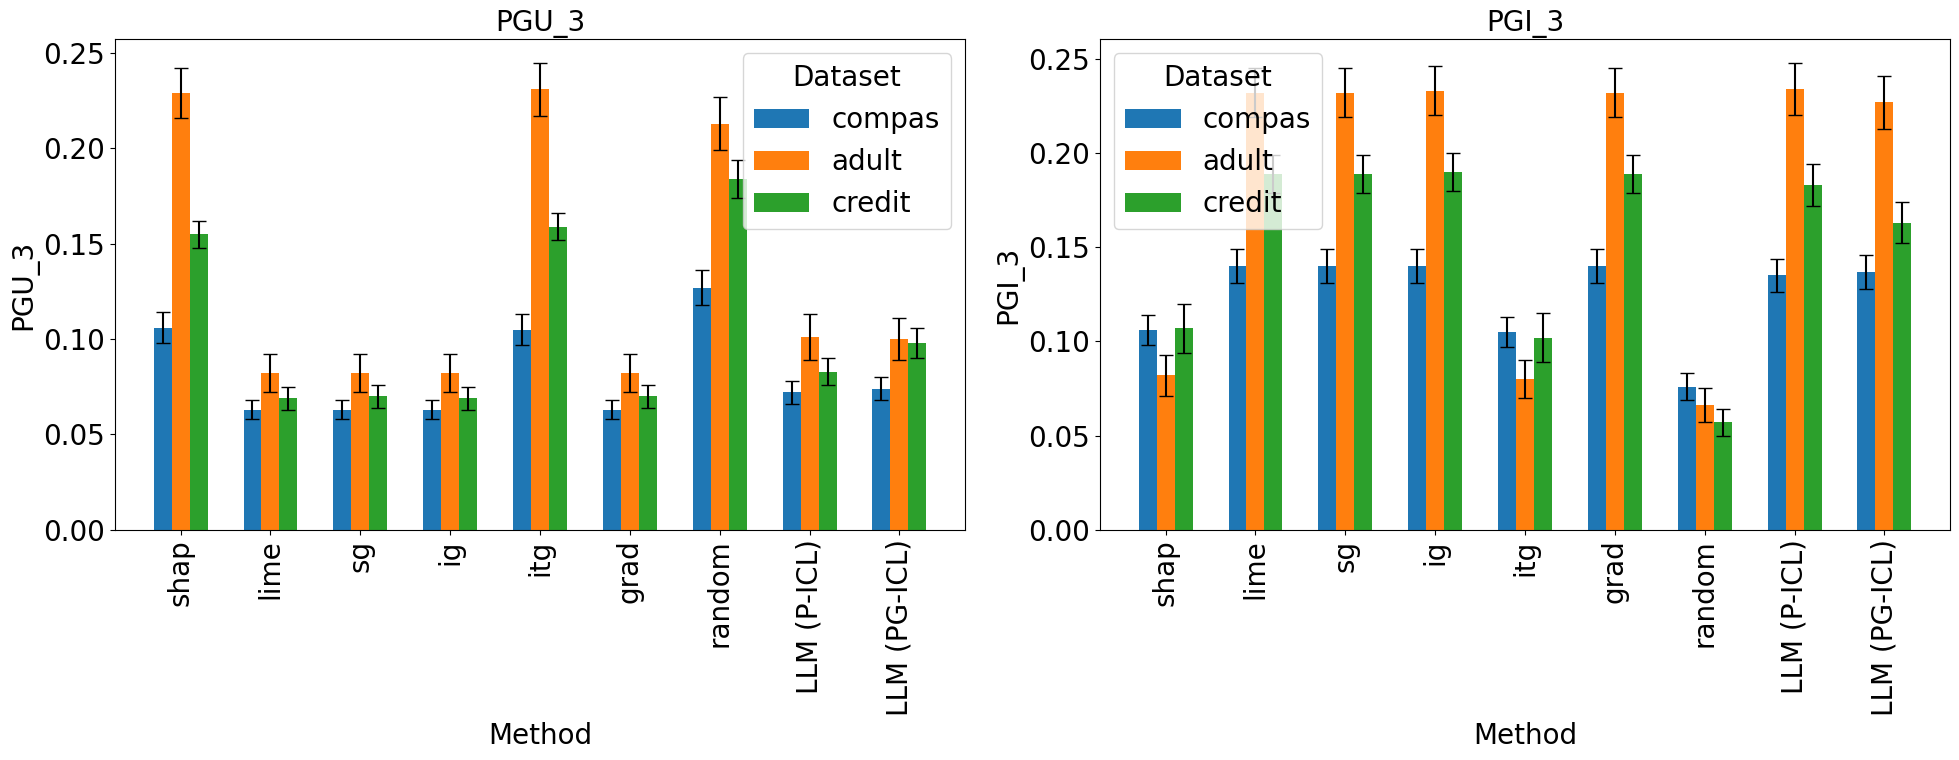

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the data from the provided string


# Converting the data into a pandas DataFrame
from io import StringIO

df = pd.read_csv("emnlp_ann_xl_results.csv")

# Updating method names
df['Method'] = df['Method'].replace({
    'LLM(Prediction-based ICL)': 'LLM (P-ICL)',
    'LLM(Perturb+Guide ICL)': 'LLM (PG-ICL)'
})

# Extracting the values and errors
def extract_values_and_errors(column):
    values = df[column].str.split(r'\+/-').str[0].astype(float)
    errors = df[column].str.split(r'\+/-').str[1].astype(float)
    return values, errors

df['PGU_3_values'], df['PGU_3_errors'] = extract_values_and_errors('PGU_3')
df['PGI_3_values'], df['PGI_3_errors'] = extract_values_and_errors('PGI_3')

# Set font size
font_size = 20  # Change this value to set the desired font size
plt.rcParams.update({'font.size': font_size})

# Plotting the bar plots
datasets = df['Dataset'].unique()
methods = df['Method'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
bar_width = 0.2  # Width of the bars
index = np.arange(len(methods))  # The x locations for the groups

# Plot for PGU_3
for i, dataset in enumerate(datasets):
    subset = df[df['Dataset'] == dataset]
    bar_positions = index + i * bar_width
    axes[0].bar(bar_positions, subset['PGU_3_values'], bar_width, yerr=subset['PGU_3_errors'], capsize=5, label=dataset)
    
axes[0].set_xlabel('Method', fontsize=font_size)
axes[0].set_ylabel('PGU_3', fontsize=font_size)
axes[0].set_title('PGU_3', fontsize=font_size)
axes[0].set_xticks(index + bar_width * (len(datasets) - 1) / 2)
axes[0].set_xticklabels(methods, rotation=90, fontsize=font_size)
axes[0].legend(title='Dataset', fontsize=font_size, title_fontsize=font_size)

# Plot for PGI_3
for i, dataset in enumerate(datasets):
    subset = df[df['Dataset'] == dataset]
    bar_positions = index + i * bar_width
    axes[1].bar(bar_positions, subset['PGI_3_values'], bar_width, yerr=subset['PGI_3_errors'], capsize=5, label=dataset)
    
axes[1].set_xlabel('Method', fontsize=font_size)
axes[1].set_ylabel('PGI_3', fontsize=font_size)
axes[1].set_title('PGI_3', fontsize=font_size)
axes[1].set_xticks(index + bar_width * (len(datasets) - 1) / 2)
axes[1].set_xticklabels(methods, rotation=90, fontsize=font_size)
axes[1].legend(title='Dataset', fontsize=font_size, title_fontsize=font_size)

plt.tight_layout()
plt.show()
plt.savefig('bar_plots.pdf', format='pdf', bbox_inches='tight')

